--------------------------------------------------------------------------------------------------------------------------------
# Dimensionality Reduction

--------------------------------------------------------------------------------------------------------------------------------
#### Things you would learn:

    Use of Sklearn Module

    Use of Various functions such as cluster,datasets,decomposition,ensemble,manifold,random_projection, Linear 
    Discrimination  analysis

    Use of Mpl_toolkits for 3D imaging

    Clustering images

##### Duration of excercise : 45min - 90min
--------------------------------------------------------------------------------------------------------------------------------


In [23]:
#Importing libraries for the excerise
from time import time

import numpy as np
import pandas as pd
import pylab as pl
from sklearn import (cluster,datasets,decomposition,ensemble,manifold,random_projection)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from mpl_toolkits.mplot3d import Axes3D 



In [32]:
# Importing the digits from the datasets.
digits = datasets.load_digits(n_class=6) # load the dataset with 6 classes (digits 0 through 5)
X= pd.DataFrame(digits.data) #Independent variables
y= pd.Series(digits.target)  # Dependent/class variable
n_samples,n_features= X.shape # no of samples(rows) , no of features (columns) gives us the shape.


C:\Users\MosesAbishekRaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':


Text(0.5,1,'A Selection from the 64-Dimensional Digits Dataset\n')

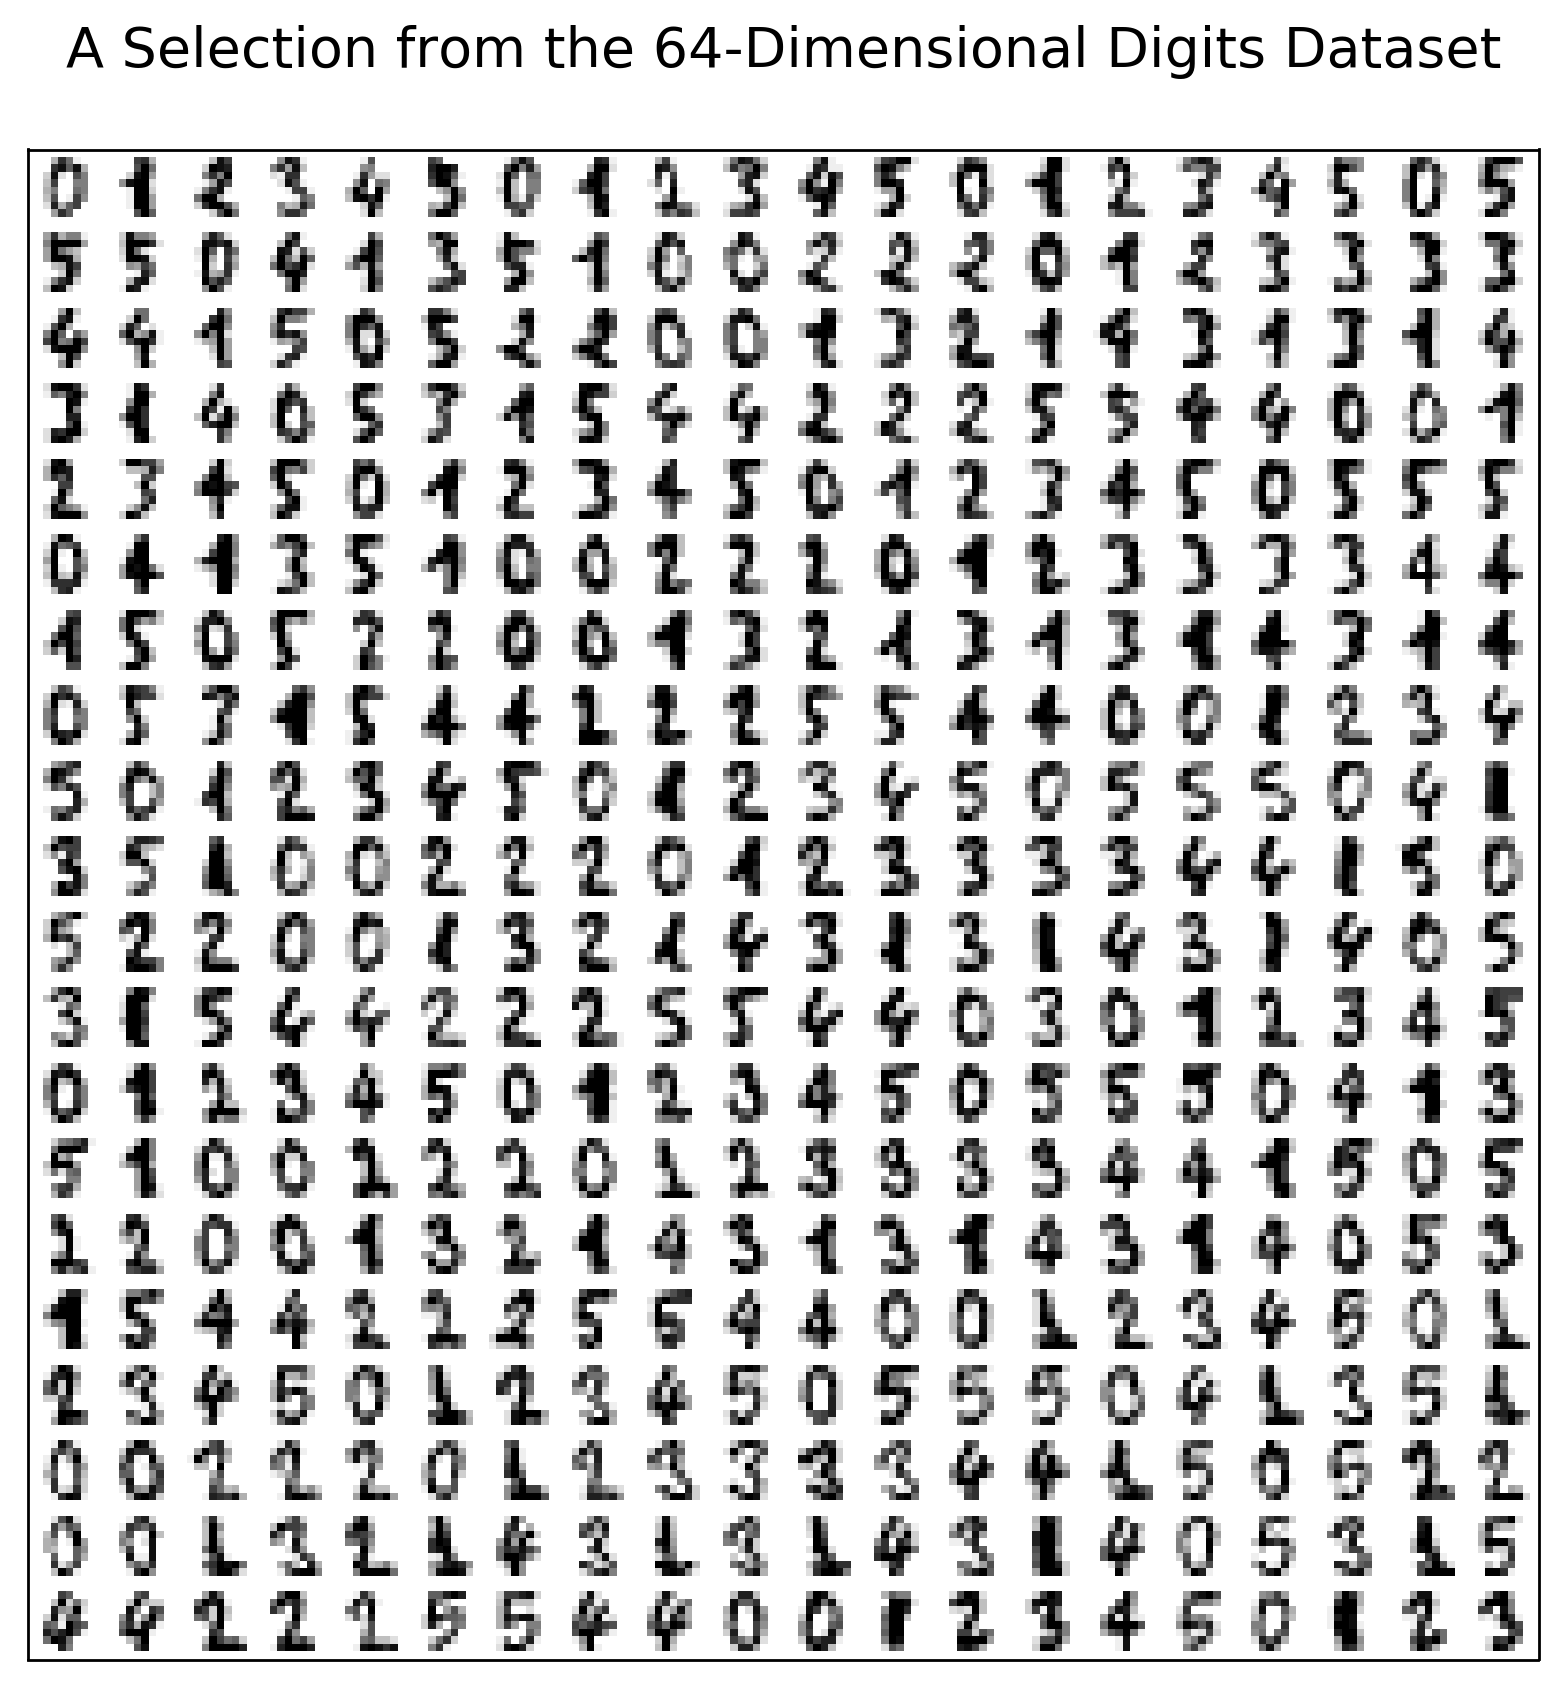

In [39]:
# Plot images of the digits
%matplotlib inline
n_img_per_row = 20 # number of digits per row
img = np.zeros((10*n_img_per_row, 10*n_img_per_row)) # generate a new 200x200 array filled with zeros
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix+8, iy:iy+8] = X.ix[i*n_img_per_row + j].reshape((8, 8)) # set each 8x8 area of the img to the values of each row (reshaped from 1x64 to 8x8)

pl.figure(figsize=(8, 8), dpi=250) # define a figure, with size (width and height) and resolution
#axes(frameon = 0) # remove the frame/border from the axes
pl.imshow(img, cmap=pl.cm.binary) # show the image using a binary color map
pl.xticks([]) # no x ticks
pl.yticks([]) # no y ticks
pl.title('A Selection from the 64-Dimensional Digits Dataset\n', fontsize=16)


In [56]:
# Scale and visualize the embedding vectors
%matplotlib inline
import matplotlib as mpl
def plot_embedding(X, title=None):
    # min-max normalization
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    pl.figure(figsize=(10, 6), dpi=250)
    ax = pl.subplot(111)
    ax.axis('off')
    ax.patch.set_visible(False)
    for i in range(X.shape[0]):
        pl.text(X[i, 0], X[i, 1], str(digits.target[i]), color=pl.cm.Set1(y[i] / 10.), fontdict={'weight': 'bold', 'size': 12})

    if hasattr(mpl.offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(digits.data.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 5e-3:
                # don't show points that are too close together
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = mpl Compute (two-dimensional) LLE on the digits dataset

#print("Computing LLE..."),
clf = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2, method='standard')
X_lle = clf.fit_transform(X)
#print("done. Reconstruction error: %g" % clf.reconstruction_error_)

# Plot LLE result
plot_embedding(X_lle, "Locally Linear Embedding of the Digits Dataset\n").offsetbox.OffsetImage(digits.images[i], cmap=pl.cm.gray_r, zoom=1.25)
            ab = mpl.offsetbox.AnnotationBbox(imagebox, X[i])
            ax.add_artist(ab)
    pl.xticks([]), pl.yticks([])
    pl.ylim([-0.1,1.1])
    pl.xlim([-0.1,1.1])

    if title is not None:
        pl.title(title, fontsize=16)

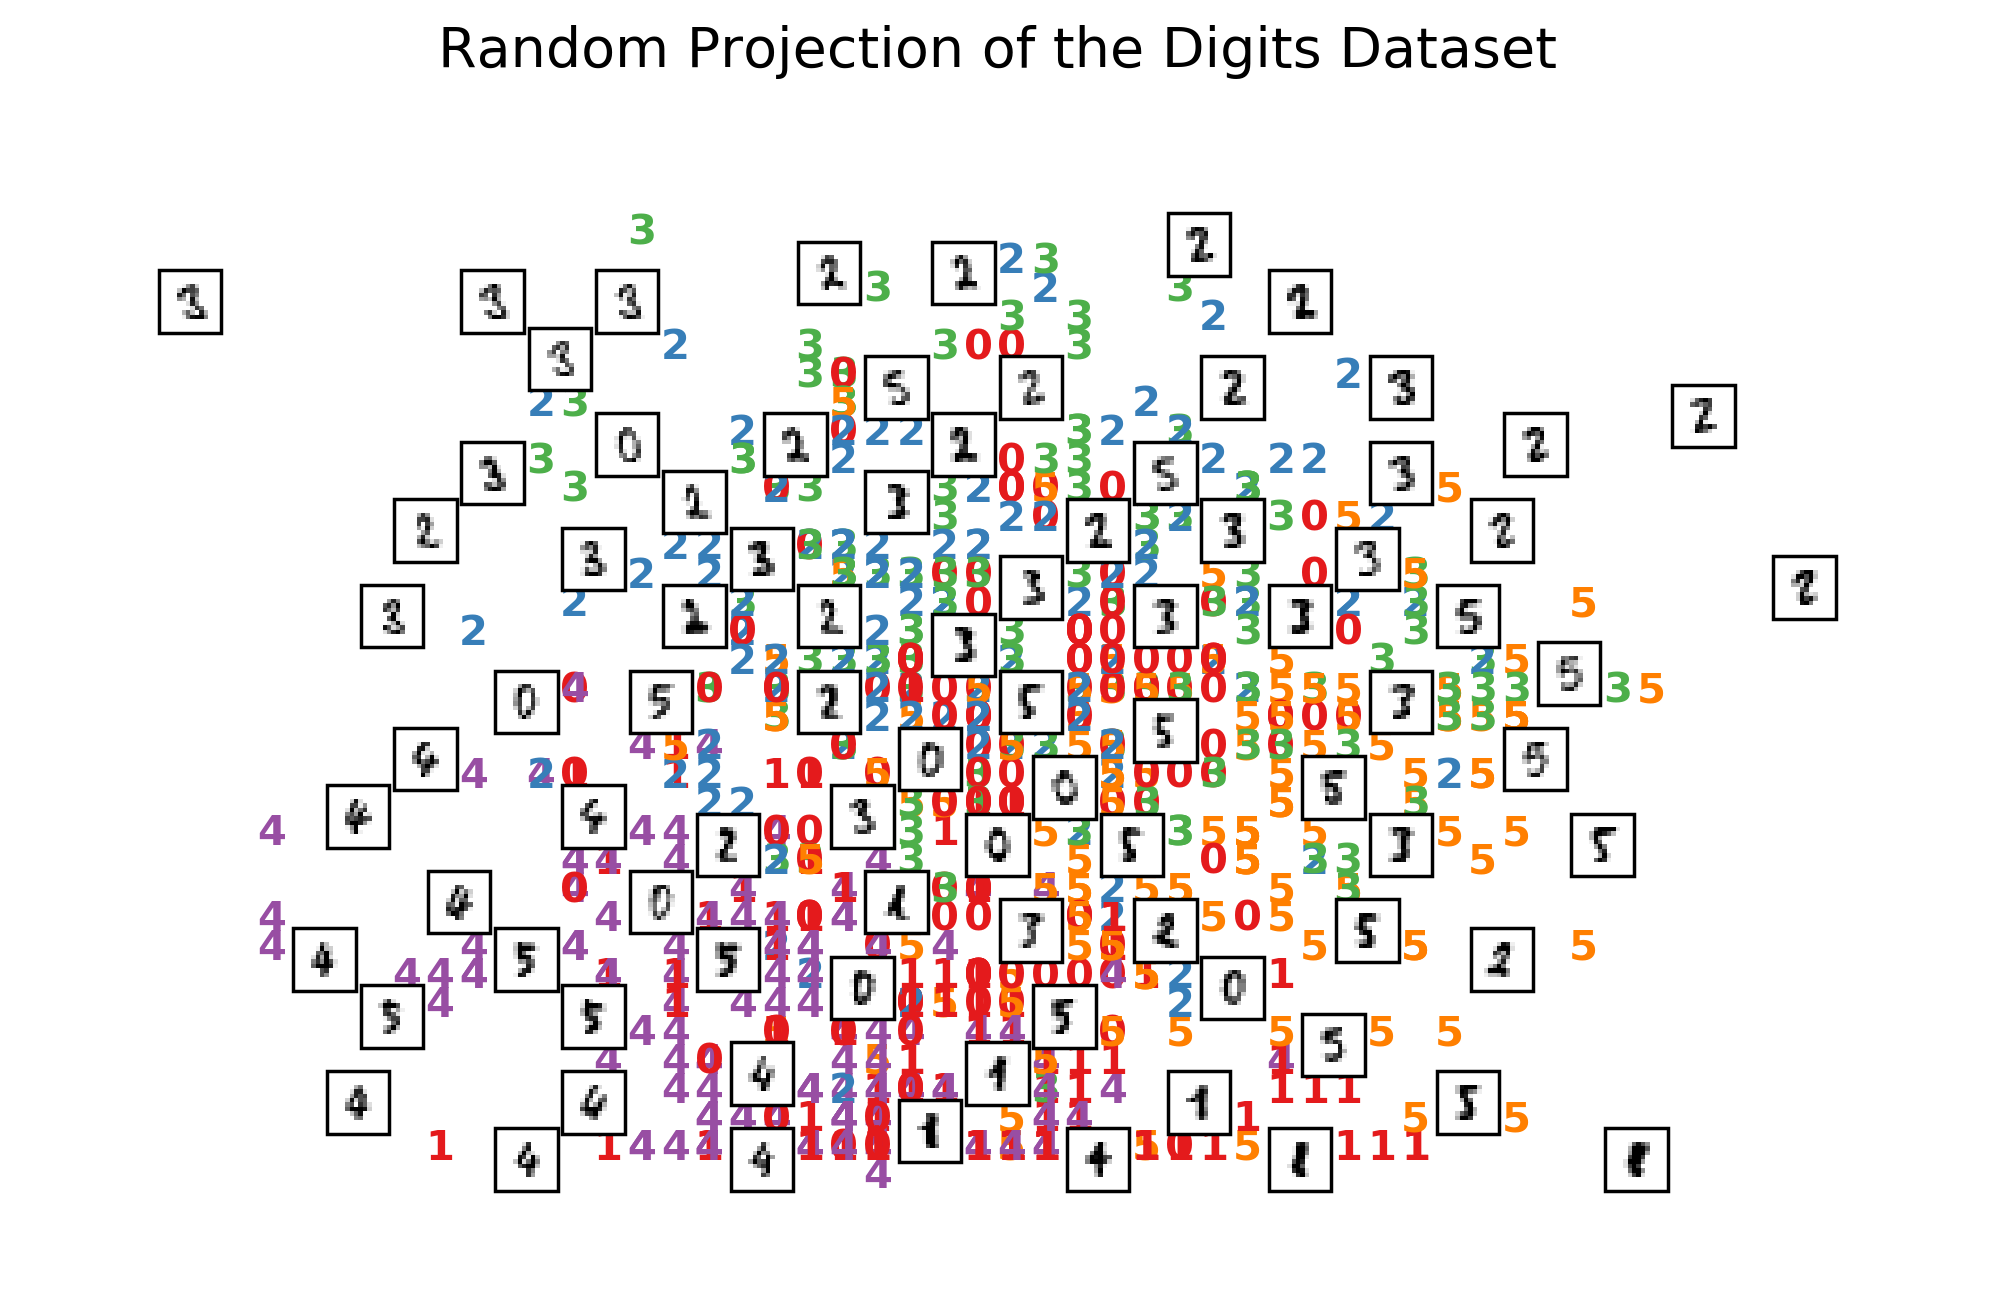

In [57]:
#import matplotlib.pyplot as plt
# Random 2D projection using a random unitary matrix

#print("Computing random projection"),
rp = random_projection.SparseRandomProjection(n_components=2, random_state=42)
X_projected = rp.fit_transform(X)
#print("done.")

# Plot random projection result
plot_embedding(X_projected, "Random Projection of the Digits Dataset\n")

In [58]:
# Projection onto the first 8 principal components

# global centering
X_centered = X - X.mean()
    
#print("Computing PCA projection..."),
pca = decomposition.PCA(n_components=8)
X_pca = pca.fit_transform(X_centered)
#print("done.")

print(pca.explained_variance_ratio_)

[ 0.19268752  0.16491423  0.11496179  0.08523838  0.05260764  0.04703754
  0.03596588  0.0311125 ]


Text(0.5,1,'Scree Plot for the Digits Dataset')

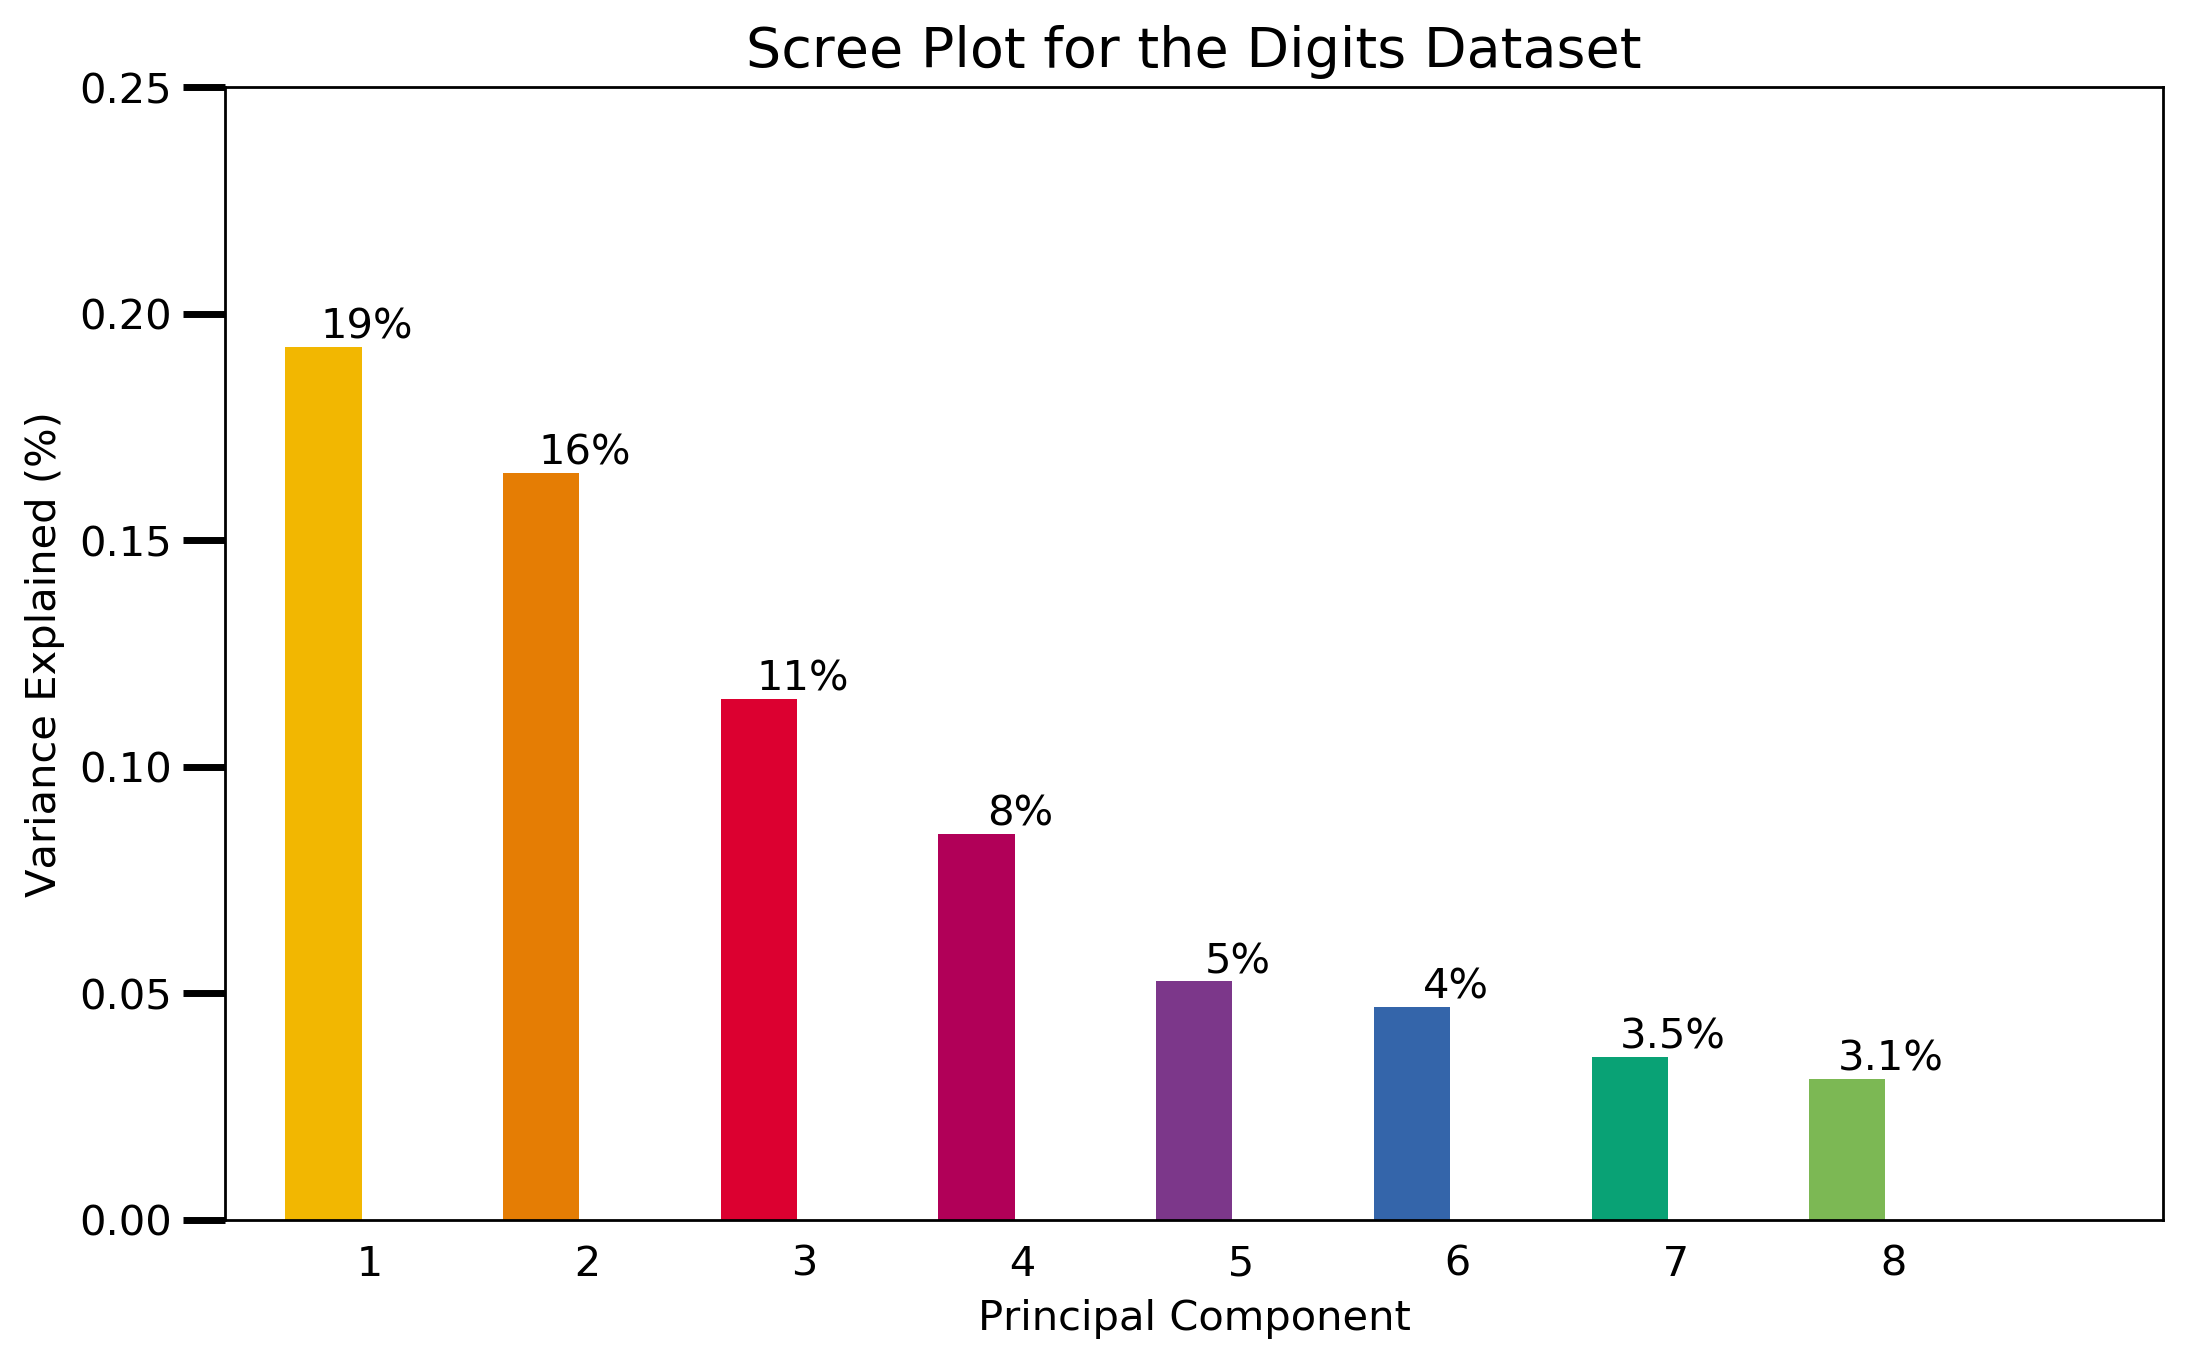

In [59]:
# Generate scree plot

N = 8
ind = np.arange(N)  # the x locations for the groups

vals = [0.19268752,
        0.16491423,
        0.11496179,
        0.08523838,
        0.05260764,
        0.04703754,
        0.03596589,
        0.03111252]

pl.figure(figsize=(10, 6), dpi=250)
ax = pl.subplot(111)
ax.bar(ind, pca.explained_variance_ratio_, 0.35, 
       color=[(0.949, 0.718, 0.004),
              (0.898, 0.49, 0.016),
              (0.863, 0, 0.188),
              (0.694, 0, 0.345),
              (0.486, 0.216, 0.541),
              (0.204, 0.396, 0.667),
              (0.035, 0.635, 0.459),
              (0.486, 0.722, 0.329),
             ])

ax.annotate(r"%d%%" % (int(vals[0]*100)), (ind[0]+0.2, vals[0]), va="bottom", ha="center", fontsize=12)
ax.annotate(r"%d%%" % (int(vals[1]*100)), (ind[1]+0.2, vals[1]), va="bottom", ha="center", fontsize=12)
ax.annotate(r"%d%%" % (int(vals[2]*100)), (ind[2]+0.2, vals[2]), va="bottom", ha="center", fontsize=12)
ax.annotate(r"%d%%" % (int(vals[3]*100)), (ind[3]+0.2, vals[3]), va="bottom", ha="center", fontsize=12)
ax.annotate(r"%d%%" % (int(vals[4]*100)), (ind[4]+0.2, vals[4]), va="bottom", ha="center", fontsize=12)
ax.annotate(r"%d%%" % (int(vals[5]*100)), (ind[5]+0.2, vals[5]), va="bottom", ha="center", fontsize=12)
ax.annotate(r"%s%%" % ((str(vals[6]*100)[:4 + (0-1)])), (ind[6]+0.2, vals[6]), va="bottom", ha="center", fontsize=12)
ax.annotate(r"%s%%" % ((str(vals[7]*100)[:4 + (0-1)])), (ind[7]+0.2, vals[7]), va="bottom", ha="center", fontsize=12)

ax.set_xticklabels(('       0',
                    '       1',
                    '       2',
                    '       3',
                    '       4',
                    '       5',
                    '       6',
                    '       7',
                    '       8'), 
                   fontsize=12)
ax.set_yticklabels(('0.00', '0.05', '0.10', '0.15', '0.20', '0.25'), fontsize=12)
ax.set_ylim(0, .25)
ax.set_xlim(0-0.45, 8+0.45)

ax.xaxis.set_tick_params(width=0)
ax.yaxis.set_tick_params(width=2, length=12)

ax.set_xlabel("Principal Component", fontsize=12)
ax.set_ylabel("Variance Explained (%)", fontsize=12)

pl.title("Scree Plot for the Digits Dataset", fontsize=16)

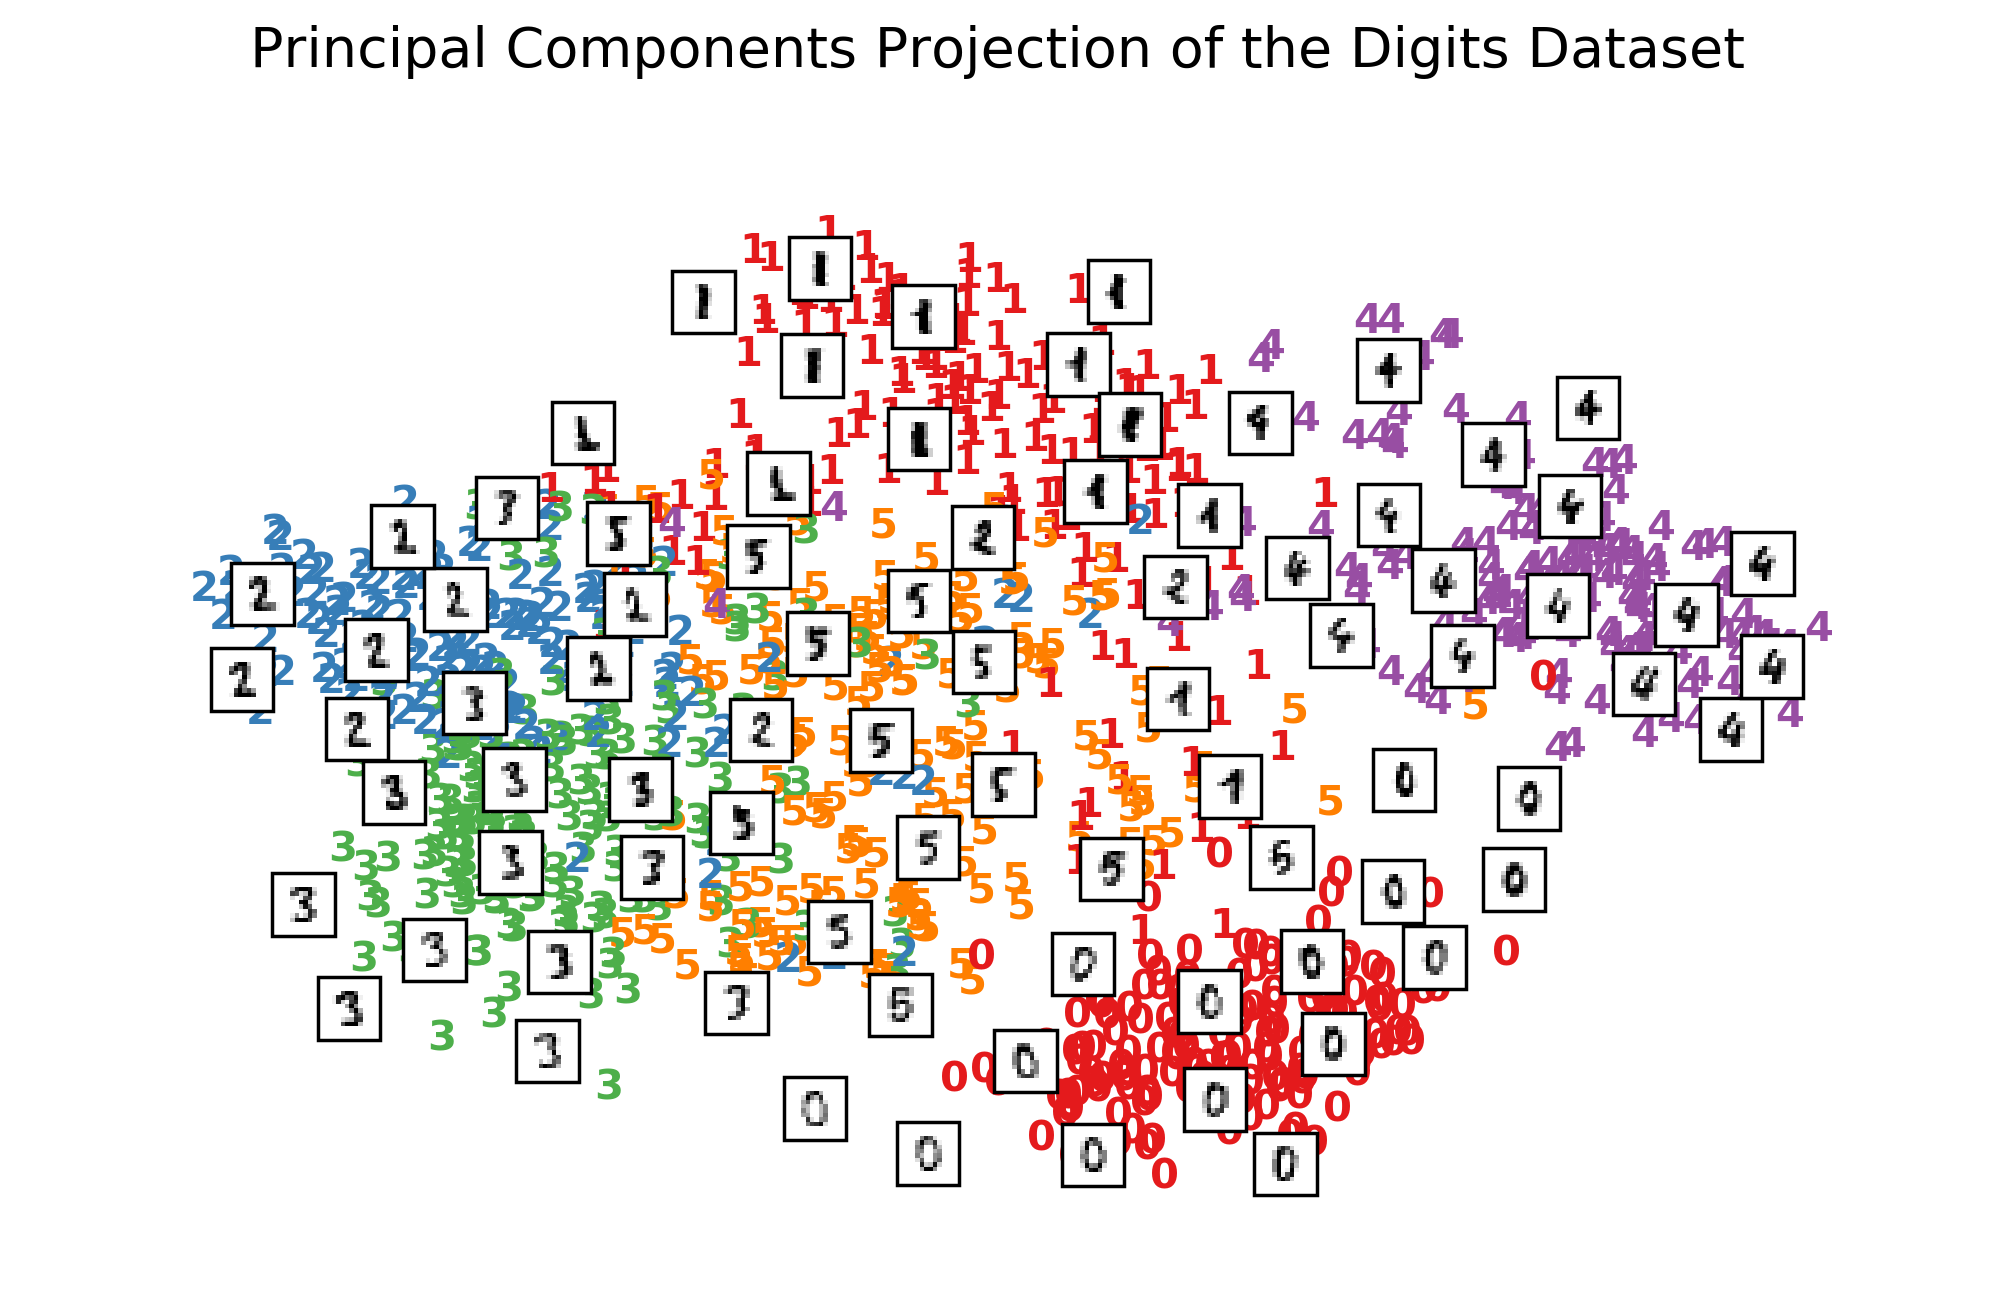

In [60]:
# Compute (two-dimensional) PCA on the digits dataset

#print("Computing PCA projection..."),
pca = decomposition.PCA(n_components=2)
X_pca = pca.fit_transform(X)
#print("done.")

# Plot PCA result
plot_embedding(X_pca, "Principal Components Projection of the Digits Dataset\n")

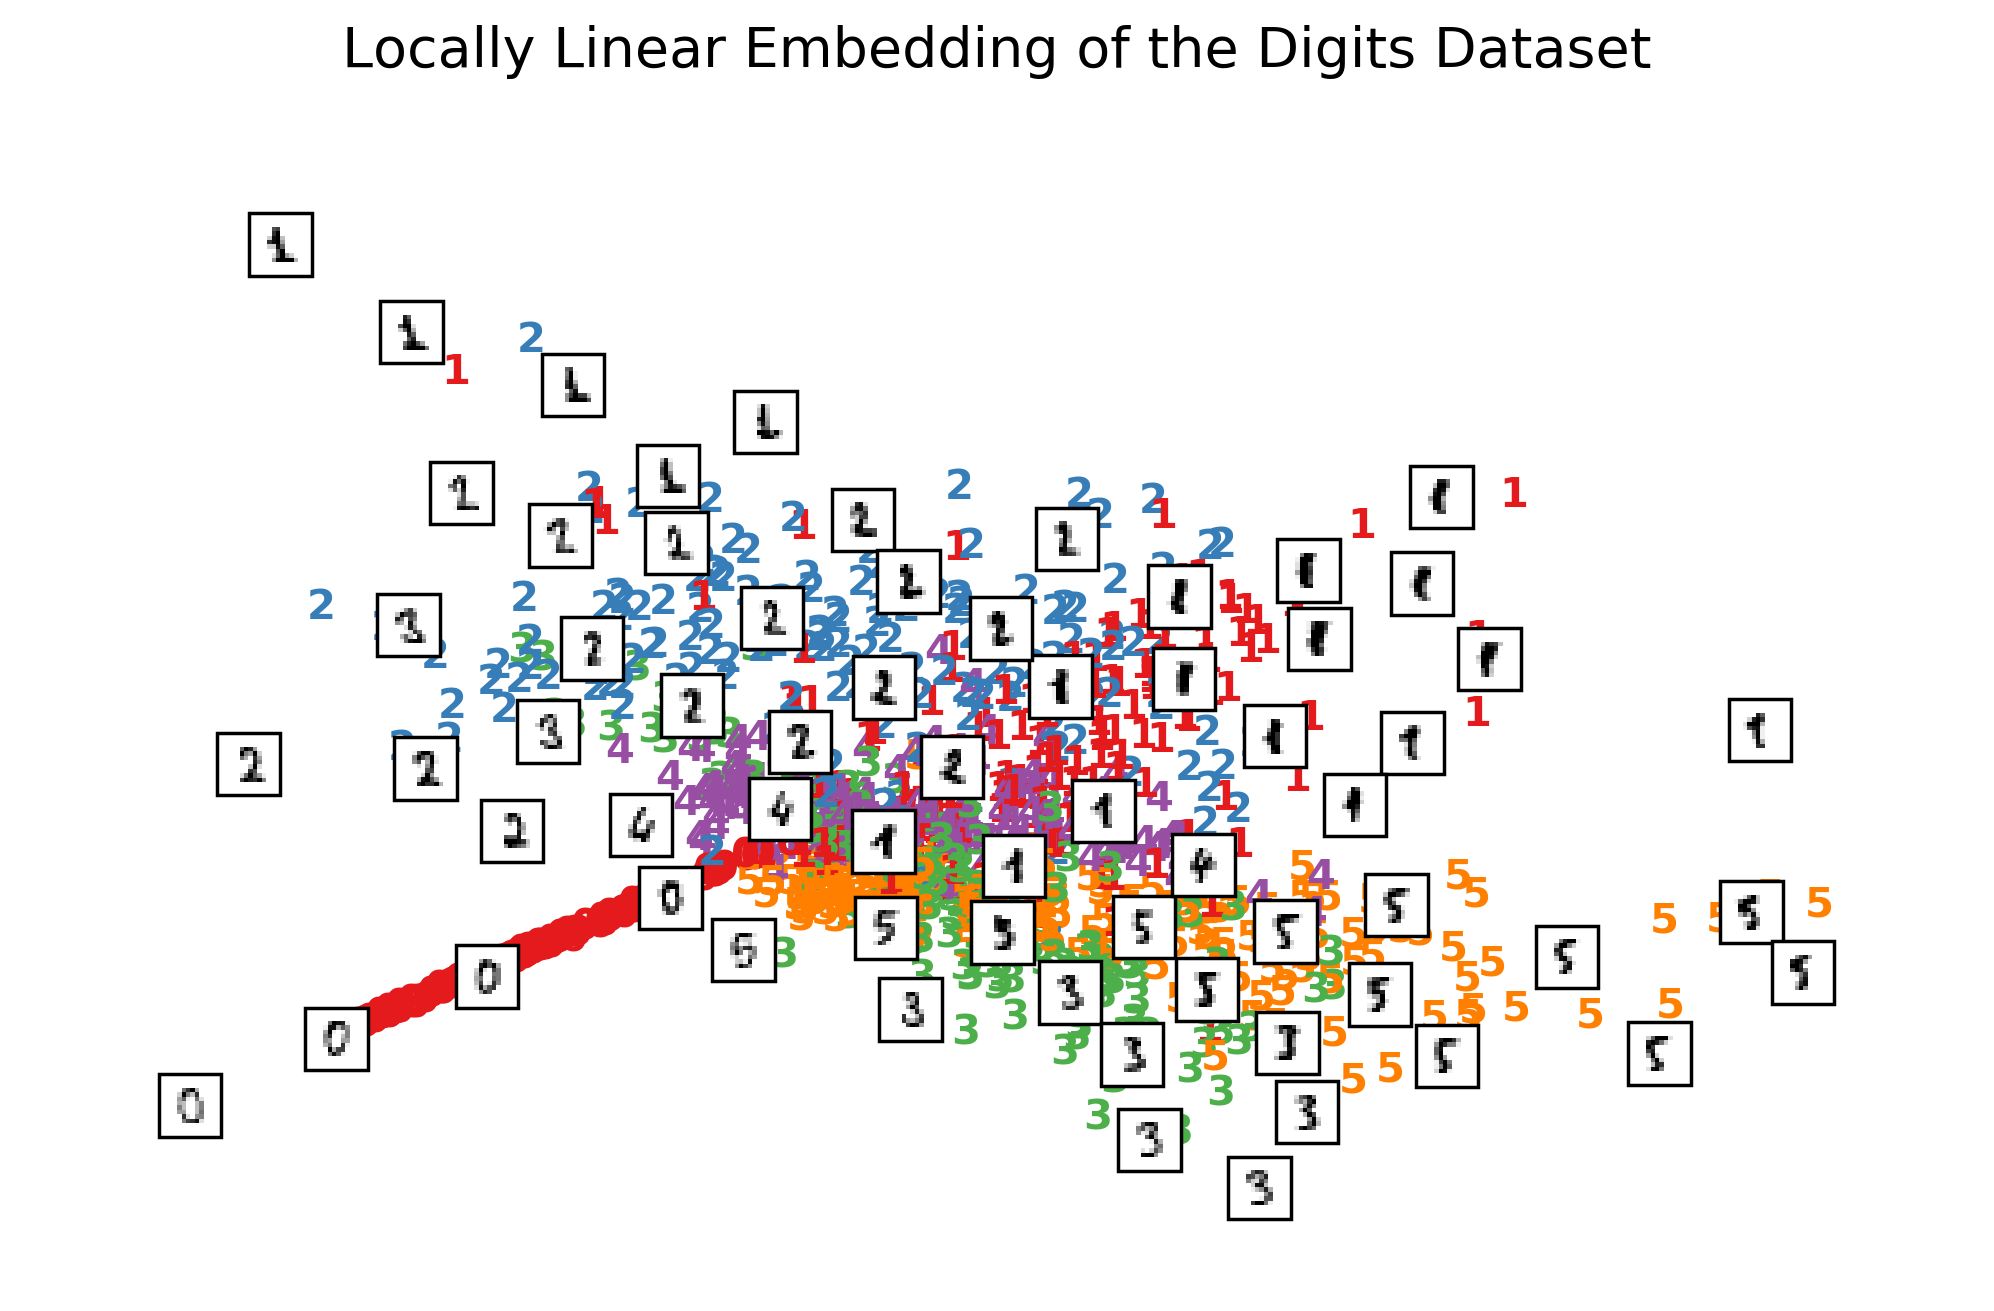

In [62]:
#Compute (two-dimensional) LLE on the digits dataset

#print("Computing LLE..."),
clf = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2, method='standard')
X_lle = clf.fit_transform(X)
#print("done. Reconstruction error: %g" % clf.reconstruction_error_)

# Plot LLE result
plot_embedding(X_lle, "Locally Linear Embedding of the Digits Dataset\n")

In [63]:
# Generate the Swiss roll

X, color = datasets.samples_generator.make_swiss_roll(n_samples=1500)

Text(0.5,0.92,'3-Dimensional Plot of the Swiss Roll Dataset')

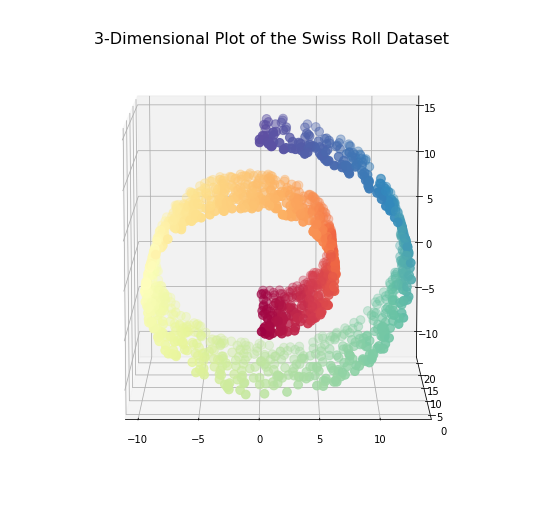

In [64]:
# Plot the Swiss roll

fig = pl.figure(figsize=(10, 20))

# compatibility matplotlib < 1.0
ax = fig.add_subplot(211, projection='3d')
ax.azim = -90
ax.elev = 10
ax.scatter(X[:, 0], X[:, 1], X[:, 2], s=75, c=color, cmap=pl.cm.Spectral)

pl.tick_params(axis='both', which='major', labelsize=10)
pl.tick_params(axis='both', which='minor', labelsize=10)

pl.axis('scaled')

pl.title("3-Dimensional Plot of the Swiss Roll Dataset", fontsize=16)

Text(0.5,1,'Locally Linear Embedding of the Swiss Roll Dataset')

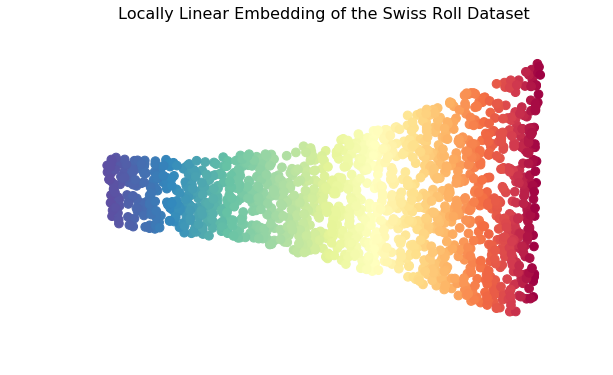

In [66]:
# Compute (two-dimensional) LLE on the Swiss roll dataset

#print("Computing LLE..."),
X_r, err = manifold.locally_linear_embedding(X, n_neighbors=12, n_components=2)
#print("done. Reconstruction error: %g" % err)

# Plot LLE result
fig = pl.figure(figsize=(10, 6))

ax = fig.add_subplot(111)

pl.tick_params(axis='both', which='major', labelsize=10)
pl.tick_params(axis='both', which='minor', labelsize=10)

ax.scatter(X_r[:, 0], X_r[:, 1], s=75, c=color, cmap=pl.cm.Spectral)
pl.axis('off')

pl.title("Locally Linear Embedding of the Swiss Roll Dataset", fontsize=16)

Text(0.5,1,'Principal Components Projection of the Swiss Roll Dataset')

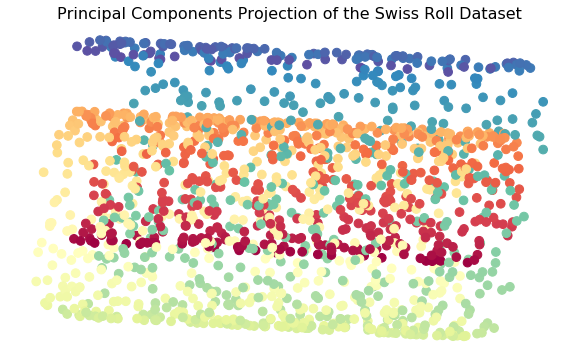

In [67]:
# Compute (two-dimensional) PCA on the Swiss roll dataset

#print("Computing PCA..."),
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
#print("done.")

# Plot PCA result

fig = pl.figure(figsize=(10, 6))

ax = fig.add_subplot(111)

pl.tick_params(axis='both', which='major', labelsize=10)
pl.tick_params(axis='both', which='minor', labelsize=10)

ax.scatter(X_pca[:, 0], X_pca[:, 1], s=75, c=color, cmap=pl.cm.Spectral)
pl.axis('off')
pl.xticks([]), pl.yticks([])

pl.title("Principal Components Projection of the Swiss Roll Dataset", fontsize=16)

In [69]:
# Load and normalize faces dataset

n_row, n_col = 2, 3 # the number of rows and columns of faces to display
n_components = n_row * n_col # the number of components to generate
image_shape = (64, 64) # the image dimensions (width and height)

# load faces data
rng = np.random.RandomState(0)
faces = datasets.fetch_olivetti_faces(shuffle=True, random_state=rng).data

n_samples, n_features = faces.shape # the number of rows (samples) and columns (features)

# global centering
faces_centered = faces - faces.mean(axis=0)

# local centering
faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)

print("Dataset consists of %d faces." % n_samples)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\MosesAbishekRaj\scikit_learn_data
Dataset consists of 400 faces.


In [70]:
def plot_gallery(title, images, n_col=n_col, n_row=n_row):
    pl.figure(figsize=(2. * n_col, 2.26 * n_row))
    pl.suptitle(title, size=16)
    for i, comp in enumerate(images):
        pl.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        pl.imshow(comp.reshape(image_shape), cmap=pl.cm.gray, interpolation='nearest', vmin=-vmax, vmax=vmax)
        pl.xticks(())
        pl.yticks(())
    pl.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

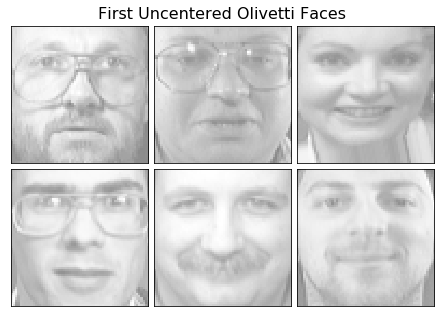

In [71]:
# Plot a sample of the uncentered input data

plot_gallery("First Uncentered Olivetti Faces", faces[:n_components])

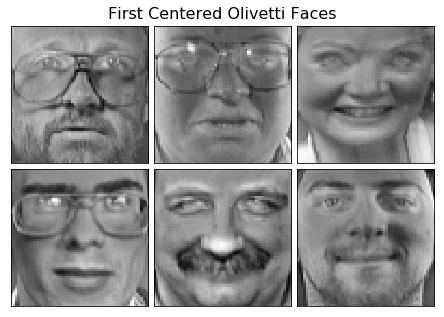

In [72]:
# Plot a sample of the input data

plot_gallery("First Centered Olivetti Faces", faces_centered[:n_components])

ValueError: cannot reshape array of size 1 into shape (64,64)

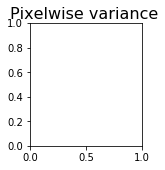

In [73]:
# Compute PCA on the dataset

name = "Eigenfaces - PCA" # estimator name
estimator = decomposition.PCA(n_components=n_components, whiten=True) # estimator
center = True # whether the transformer uses the clustering API

#print("Extracting the top %d %s..." % (n_components, name)),
t0 = time()
data = faces
if center:
    data = faces_centered
estimator.fit(data)
train_time = (time() - t0)
#print("done in %0.3fs" % train_time)

if hasattr(estimator, 'cluster_centers_'):
    components_ = estimator.cluster_centers_
else:
    components_ = estimator.components_

if hasattr(estimator, 'noise_variance_'):
    plot_gallery("Pixelwise variance", estimator.noise_variance_.reshape(1, -1), n_col=1, n_row=1)
plot_gallery('%s - Train Time %.1fs' % (name, train_time), components_[:n_components])

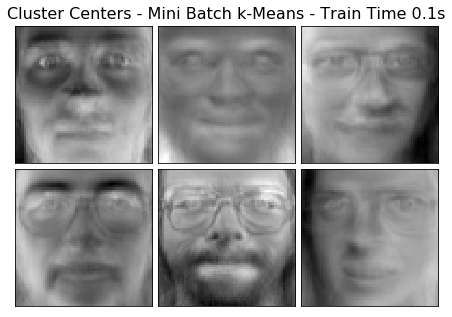

In [74]:
# Compute (mini batch) k-means clustering on the dataset

name = "Cluster Centers - Mini Batch k-Means" # estimator name
estimator = cluster.MiniBatchKMeans(n_clusters=n_components, tol=1e-3, batch_size=20, max_iter=50, random_state=rng) # estimator
center = True # whether the transformer uses the clustering API

#print("Extracting the top %d %s..." % (n_components, name)),
t0 = time()
data = faces
if center:
    data = faces_centered
estimator.fit(data)
train_time = (time() - t0)
#print("done in %0.3fs" % train_time)

if hasattr(estimator, 'cluster_centers_'):
    components_ = estimator.cluster_centers_
else:
    components_ = estimator.components_

if hasattr(estimator, 'noise_variance_'):
    plot_gallery("Pixelwise variance", estimator.noise_variance_.reshape(1, -1), n_col=1, n_row=1)
plot_gallery('%s - Train Time %.1fs' % (name, train_time), components_[:n_components])